
# **Importing libraries & uploading/reading the data**

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, accuracy_score,confusion_matrix, roc_curve, f1_score, recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

# files are for uploading to and downloading from google collab 
from google.colab import files
import io

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#  Upload, download & read files 
uploaded = files.upload()

Saving training_data_1.csv to training_data_1.csv


In [3]:
df = pd.read_csv(io.StringIO(uploaded['training_data_1.csv'].decode('utf-8')))


# **Understanding the data frame**


In [4]:
# Data frame visualization 
df.head()

,Transaction,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,Response
0,T1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0
1,T2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0
2,T3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1.0,0
3,T4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1.0,0
4,T5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,2.0,0


In [5]:
# Verify number of rows & columns 
print('(Rows, Columns) = ', df.shape)

(Rows, Columns) =  (249999, 32)


In [6]:
list(df.columns.values) 

['Transaction',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'Response']

Number of Non-Fradulant(0) VS Fradulent Transactions(1):



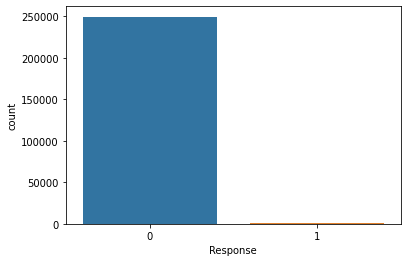

In [7]:
# Checking data balance
print('Number of Non-Fradulant(0) VS Fradulent Transactions(1):')
print()
sns.countplot(x=df['Response'])
plt.savefig("response_histogram.png")

#**Data pre-processing**#

In [8]:
# Find NA rows
na_rows = df.isnull().sum()
print(na_rows.sum())

61


In [9]:
# Remove NA rows
df_clean = df.dropna()
df_clean.shape

(249943, 32)

In [10]:
# Remove 'Transaction' column 
df_clean = df_clean.drop(columns=['Transaction'])

In [11]:
# Separate x-values and y-values
X = df_clean.iloc[:, :-1]
Y = df_clean.iloc[:, -1]

# **Split & standardize data set** #

In [12]:
# Split and train the data using stratify
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

# How is data split. 
Counter(y_train)

Counter({0: 174639, 1: 321})

In [13]:
# Standarize data set
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#**MODEL 1: Multilayer Perceptron (MLP) Model**#

In [15]:
# Create a base model
mlp_class_1 = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='logistic')

#Fitting model
mlp_class_1.fit(x_train, y_train)
print('Parameters:', mlp_class_1)

Parameters: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [16]:
# Predict y-values
preds_MLP_1 = mlp_class_1.predict(x_test)

**Results:**

In [17]:
# Confusion Matrix
confusion_matrix_MLP = pd.crosstab(y_test, preds_MLP_1, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_MLP

Predicted,0,1
Actual,,
0,74825,21
1,27,110


In [18]:
# Classification Report
print(classification_report(y_test, preds_MLP_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74846
           1       0.84      0.80      0.82       137

    accuracy                           1.00     74983
   macro avg       0.92      0.90      0.91     74983
weighted avg       1.00      1.00      1.00     74983



In [19]:
#f1 score
print('f1 score = ',f1_score(y_test,preds_MLP_1))

f1 score =  0.8208955223880597


In [20]:
# Accuracy
accuracy_MLP = accuracy_score(y_test, preds_MLP_1)
print('Accuracy_RF =', accuracy_MLP)

Accuracy_RF = 0.9993598549004441


# **MODEL 2: MLP model using GridSearch w/ Cross-Validation** #

In [ ]:
# Using GridSearch to find the best n_neighbor value. 
param_grid_MLP = {
    'hidden_layer_sizes': [(40,40,40),(60,60,60),(80,80,80)],
    'activation': ['logistic'],
    'alpha': [0.000001, 0.00001, 0.0001],
    'max_iter': [300, 500],
}
# Create model
mlp_class_2 = MLPClassifier()

# Instantiate the grid search model
grid_search_MLP = GridSearchCV(estimator=mlp_class_2,param_grid=param_grid_MLP,cv=5) 

In [ ]:
# Fit the grid search to the data
grid_search_MLP.fit(x_train, y_train)
grid_search_MLP.best_params_

{'activation': 'logistic',
 'alpha': 1e-06,
 'hidden_layer_sizes': (80, 80, 80),
 'max_iter': 300}

In [ ]:
best_grid_MLP = grid_search_MLP.best_estimator_
best_grid_MLP

MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80, 80, 80), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Predict y-values
preds_MLP_2Grid = best_grid_MLP.predict(x_test)

In [ ]:
# Confusion Matrix
confusion_matrix_MLP = pd.crosstab(y_test, preds_MLP_2Grid, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_MLP

Predicted,0,1
Actual,,
0,74830,16
1,25,112


In [ ]:
# f1 score
print('f1 score= ', f1_score(y_test, preds_MLP_2Grid))

f1 score=  0.8452830188679246


In [ ]:
# Classification Report
print(classification_report(y_test, preds_MLP_2Grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74846
           1       0.88      0.82      0.85       137

    accuracy                           1.00     74983
   macro avg       0.94      0.91      0.92     74983
weighted avg       1.00      1.00      1.00     74983



In [ ]:
# Accuracy
accuracy_MLP_2 = accuracy_score(y_test, preds_MLP_2Grid)
print('Accuracy_RF =', accuracy_MLP)

Accuracy_RF = 0.9993731912566849


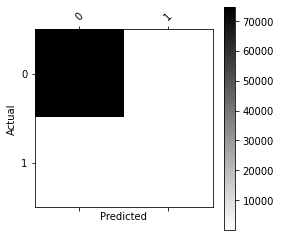

In [ ]:
def plot_confusion_matrix(confusion_matrix_MLP, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(confusion_matrix_MLP, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(confusion_matrix_MLP.columns))
    plt.xticks(tick_marks, confusion_matrix_MLP.columns, rotation=45)
    plt.yticks(tick_marks, confusion_matrix_MLP.index)
    #plt.tight_layout()
    plt.ylabel(confusion_matrix_MLP.index.name)
    plt.xlabel(confusion_matrix_MLP.columns.name)

plot_confusion_matrix(confusion_matrix_MLP)
plt.savefig("confusion matrix.png")

In [ ]:
precision = precision_score(y_test, preds_MLP_2Grid)
print('Precision: ', precision)
recall = recall_score(y_test, preds_MLP_2Grid)
print('recall: ', recall)

Precision:  0.875
recall:  0.8175182481751825


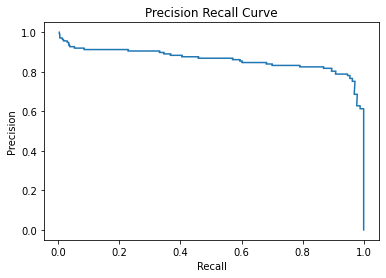

In [ ]:
# Precision Recall Curve
preds_grid_MLP_prob = best_grid_MLP.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, preds_grid_MLP_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.savefig("precision_recall_curve.png")

In [ ]:
print('recall: ', recall)
print('Precision: ', precision)

recall:  [1.         0.99270073 0.99270073 ... 0.01459854 0.00729927 0.        ]
Precision:  [0.00322793 0.00320445 0.00320452 ... 1.         1.         1.        ]


In [ ]:
# AUC score 
print("AUC score is: ", roc_auc_score(y_test, preds_MLP_2Grid))

AUC score is:  0.9086522379480513


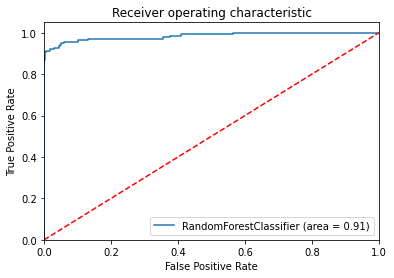

In [ ]:
# Receiving operating characteristics: ROC_score & ROC_curve
logit_roc_auc = roc_auc_score(y_test, best_grid_MLP.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, best_grid_MLP.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
#define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
  print ('Sensitivity:', tpr[thresholds > threshold][-1])
  print ('Specificity:', 1-fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.8175182481751825
Specificity: 0.9998263100232477


# **MODEL 3: MLP Model using NearMiss-undersampling** #

In [ ]:
# Perform undersampling technique; Create new synthetic data (1) samples.  
nm = NearMiss(n_neighbors=3)
x_train, y_train = nm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train)

Counter({0: 321, 1: 321})

In [ ]:
# Create model
mlp_class_3 = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='logistic', alpha=0.000001, max_iter= 300)

#Fitting model
mlp_class_3.fit(x_train,y_train)
print('Parameters:', mlp_class_3)

Parameters: MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Predict y-values
preds_MLP_3 = mlp_class_3.predict(x_test)

In [ ]:
# Confusion Matrix
confusion_matrix_MLP = pd.crosstab(y_test, preds_MLP_3, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_MLP

Predicted,0,1
Actual,,
0,25235,49611
1,3,134


In [ ]:
# Classification Report
print(classification_report(y_test, preds_MLP_3))

              precision    recall  f1-score   support

           0       1.00      0.34      0.50     74846
           1       0.00      0.98      0.01       137

    accuracy                           0.34     74983
   macro avg       0.50      0.66      0.25     74983
weighted avg       1.00      0.34      0.50     74983



In [ ]:
#f1 score
print('f1 score = ',f1_score(y_test,preds_MLP_3))

f1 score =  0.005372679523675875


#**MODEL 4: MLP Model using SMOTE-oversampling**#

In [ ]:
# Split and train the data using stratify
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

# How is data split. 
Counter(y_train)

Counter({0: 174639, 1: 321})

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Perform oversampling technique; Create new synthetic data (1) samples.  
sm = SMOTE(random_state=10, k_neighbors=5)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# New data: Even split
Counter(y_train)

Counter({0: 174639, 1: 174639})

In [ ]:
# Create model
mlp_class_4 = MLPClassifier(hidden_layer_sizes=(50,50,50), activation='logistic', alpha=0.000001, max_iter= 300)

#Fitting model
mlp_class_4.fit(x_train,y_train)
print('Parameters:', mlp_class_4)

Parameters: MLPClassifier(activation='logistic', alpha=1e-06, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [ ]:
# Predict y-values
preds_MLP_4 = mlp_class_4.predict(x_test)

**Results:**

In [ ]:
# Confusion Matrix
confusion_matrix_MLP = pd.crosstab(y_test, preds_MLP_4, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_MLP

Predicted,0,1
Actual,,
0,74791,55
1,29,108


In [ ]:
# Classification Report
print(classification_report(y_test, preds_MLP_4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74846
           1       0.66      0.79      0.72       137

    accuracy                           1.00     74983
   macro avg       0.83      0.89      0.86     74983
weighted avg       1.00      1.00      1.00     74983



In [ ]:
#f1 score
print('f1 score = ',f1_score(y_test,preds_MLP_4))

f1 score =  0.7199999999999999


In [ ]:
# Accuracy
accuracy_MLP = accuracy_score(y_test, preds_MLP_4)
print('Accuracy_RF =', accuracy_MLP)

Accuracy_RF = 0.9988797460757772


#**MODEL 5: MLP model using SMOTE & GridSearch w/ Cross-Validation**#

In [ ]:
# Using GridSearch to find the best n_neighbor value. 
param_grid_MLP_2 = {
    'hidden_layer_sizes': [(80,80,80)],
    'activation': ['logistic'],
    'alpha': [0.0000001, 0.000001],
    'max_iter': [300, 350],
}
# Create model
mlp_class_5 = MLPClassifier()

# Instantiate the grid search model
grid_search_MLP_5 = GridSearchCV(estimator=mlp_class_5,param_grid=param_grid_MLP_2,cv=5)

In [ ]:
# Fit the grid search to the data
grid_search_MLP_5.fit(x_train, y_train)
grid_search_MLP_5.best_params_

{'activation': 'logistic',
 'alpha': 1e-07,
 'hidden_layer_sizes': (80, 80, 80),
 'max_iter': 300}

In [ ]:
best_grid_MLP_5 = grid_search_MLP_5.best_estimator_
best_grid_MLP_5

MLPClassifier(activation='logistic', alpha=1e-07, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80, 80, 80), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# Predict y-values
preds_MLP_5Grid = best_grid_MLP_5.predict(x_test)

**Results:**

In [ ]:
# Confusion Matrix
confusion_matrix_MLP = pd.crosstab(y_test, preds_MLP_5Grid, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_MLP

Predicted,0,1
Actual,,
0,74780,66
1,27,110


In [ ]:
# f1 score
print('f1 score= ', f1_score(y_test, preds_MLP_5Grid))

f1 score=  0.7028753993610223


In [ ]:
# Classification Report
print(classification_report(y_test, preds_MLP_5Grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74846
           1       0.62      0.80      0.70       137

    accuracy                           1.00     74983
   macro avg       0.81      0.90      0.85     74983
weighted avg       1.00      1.00      1.00     74983



In [ ]:
# Accuracy
accuracy_MLP = accuracy_score(y_test, preds_MLP_5Grid)
print('Accuracy_RF =', accuracy_MLP)

Accuracy_RF = 0.9987597188696105


#**MODEL 6: RANDOM FOREST CLASSIFIER**#

In [21]:
# Split and train the data using stratify
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=1)

# How is data split. 
Counter(y_train)

Counter({0: 174639, 1: 321})

In [22]:
# Important hyperparameter selection:
# Create the parameter grid based on the results of random search 
param_grid_rf = {
    'bootstrap': [True],   # GridSearch results from deliverable 2
    'n_estimators': [20],  # GridSearch results from deliverable 2
    'max_features': [15],  # GridSearch results from deliverable 2
    }
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, cv = 5)

In [23]:
# Fit the grid search to the data
grid_search_rf.fit(x_train, y_train)
grid_search_rf.best_params_

{'bootstrap': True, 'max_features': 15, 'n_estimators': 20}

In [24]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# Predict y-values
preds_grid_rf = best_grid_rf.predict(x_test)

In [62]:
# Confusion Matrix
df_confusion = pd.crosstab(y_test, preds_grid_rf, rownames=['Actual'], colnames=['Predicted'])
df_confusion

Predicted,0,1
Actual,,
0,74839,7
1,28,109


In [63]:
# f1 score
print('f1 score= ', f1_score(y_test, preds_grid_rf))

f1 score=  0.8616600790513834


In [64]:
# Classification Report
print(classification_report(y_test, preds_grid_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74846
           1       0.94      0.80      0.86       137

    accuracy                           1.00     74983
   macro avg       0.97      0.90      0.93     74983
weighted avg       1.00      1.00      1.00     74983



In [65]:
# Accuracy
accuracy_RF = accuracy_score(y_test, preds_grid_rf)
print('Accuracy_RF =', accuracy_RF)

Accuracy_RF = 0.9995332275315738


In [66]:
precision = precision_score(y_test, preds_grid_rf)
print('Precision: ', precision)
recall = recall_score(y_test, preds_grid_rf)
print('recall: ', recall)

Precision:  0.9396551724137931
recall:  0.7956204379562044


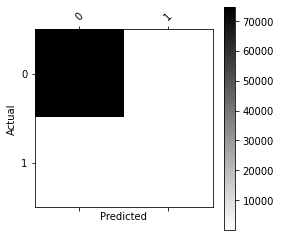

In [51]:
def plot_confusion_matrix(confusion_matrix_MLP, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(confusion_matrix_MLP, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(confusion_matrix_MLP.columns))
    plt.xticks(tick_marks, confusion_matrix_MLP.columns, rotation=45)
    plt.yticks(tick_marks, confusion_matrix_MLP.index)
    #plt.tight_layout()
    plt.ylabel(confusion_matrix_MLP.index.name)
    plt.xlabel(confusion_matrix_MLP.columns.name)

plot_confusion_matrix(confusion_matrix_MLP)
plt.savefig("confusion matrix.png")

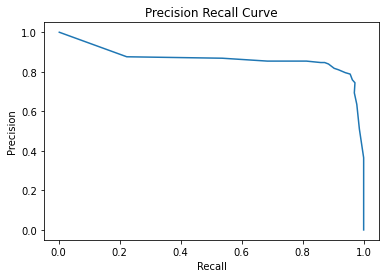

In [67]:
# Precision Recall Curve
preds_grid_MLP_prob = best_grid_rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, preds_grid_MLP_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.savefig("precision_recall_curve.png")

In [59]:
print('recall: ', recall)
print('Precision: ', precision)

recall:  [1.         0.87591241 0.86861314 0.8540146  0.8540146  0.8540146
 0.84671533 0.84671533 0.83941606 0.81751825 0.81021898 0.79562044
 0.78832117 0.75912409 0.74452555 0.72992701 0.71532847 0.69343066
 0.6350365  0.51094891 0.3649635  0.        ]
Precision:  [0.00182708 0.22304833 0.53603604 0.68421053 0.76470588 0.8125
 0.85925926 0.87218045 0.88461538 0.90322581 0.91735537 0.93965517
 0.95575221 0.96296296 0.97142857 0.97087379 0.97029703 0.96938776
 0.97752809 0.98591549 1.         1.        ]


In [58]:
# AUC score 
print("AUC score is: ", roc_auc_score(y_test, preds_grid_rf))

AUC score is:  0.8977634562920535


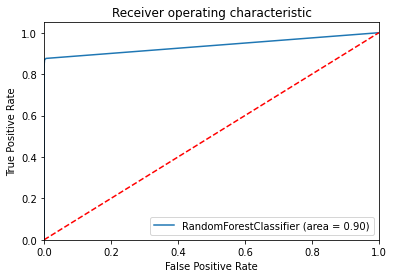

In [68]:
# Receiving operating characteristics: ROC_score & ROC_curve
logit_roc_auc = roc_auc_score(y_test, best_grid_rf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, best_grid_rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [71]:
#define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
  print ('Sensitivity:', tpr[thresholds > threshold][-1])
  print ('Specificity:', 1-fpr[thresholds > threshold][-1])

evaluate_threshold(0.5)

Sensitivity: 0.7956204379562044
Specificity: 0.9999064746279026


#**TEST DATA: Uploading/reading the test data**#

In [31]:
#  Upload, download & read files 
uploaded = files.upload()

Saving imbalanced_testing_data_1_predictor_values.csv to imbalanced_testing_data_1_predictor_values.csv


In [33]:
df_Test = pd.read_csv(io.StringIO(uploaded['imbalanced_testing_data_1_predictor_values.csv'].decode('utf-8')))
df_Test.head()

,Transaction,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,T263275,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,160870
1,T250007,2.091651,-0.169025,-1.668564,-0.058837,0.684833,0.148902,0.003661,-0.018512,0.358000,0.235923,-0.042033,0.674443,0.086213,0.414888,-0.524910,0.439062,-0.948905,0.028002,0.852307,-0.139733,-0.311108,-0.854486,0.225296,-0.354132,-0.171976,0.210693,-0.082989,-0.072972,8.99,154679
2,T255404,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,-3.064730,3.480602,-3.735153,-0.594778,-8.229952,-1.476094,-0.408471,-1.481283,0.347627,-1.164414,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,157207
3,T250006,1.801664,-0.894195,-0.156837,0.611137,-1.047178,-0.129124,-0.733517,0.014156,-0.625758,1.090806,0.916235,1.256150,1.206246,-0.045645,-0.126912,-0.898035,-0.735040,1.615621,-1.195031,-0.381646,-0.341791,-0.653244,0.345701,-0.070720,-0.568136,-0.956699,0.067724,-0.007922,113.00,154679
4,T263081,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,160791


#**TEST DATA: Understanding the test data frame**##

In [34]:
# Verify number of rows & columns 
print('(Rows, Columns) = ', df_Test.shape)

(Rows, Columns) =  (43, 31)


In [35]:
# Data frame visualization 
df_Test.head()

,Transaction,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,T263275,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,160870
1,T250007,2.091651,-0.169025,-1.668564,-0.058837,0.684833,0.148902,0.003661,-0.018512,0.358000,0.235923,-0.042033,0.674443,0.086213,0.414888,-0.524910,0.439062,-0.948905,0.028002,0.852307,-0.139733,-0.311108,-0.854486,0.225296,-0.354132,-0.171976,0.210693,-0.082989,-0.072972,8.99,154679
2,T255404,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,-3.064730,3.480602,-3.735153,-0.594778,-8.229952,-1.476094,-0.408471,-1.481283,0.347627,-1.164414,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,157207
3,T250006,1.801664,-0.894195,-0.156837,0.611137,-1.047178,-0.129124,-0.733517,0.014156,-0.625758,1.090806,0.916235,1.256150,1.206246,-0.045645,-0.126912,-0.898035,-0.735040,1.615621,-1.195031,-0.381646,-0.341791,-0.653244,0.345701,-0.070720,-0.568136,-0.956699,0.067724,-0.007922,113.00,154679
4,T263081,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,160791


#**TEST DATA: Data pre-processing**#

In [36]:
# Find NA rows
na_rows_test = df_Test.isnull().sum()
print(na_rows_test.sum())

0


In [37]:
# Remove 'Transaction' column 
x_test_df = df_Test.drop(columns=['Transaction'])

In [38]:
x_test_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,160870
1,2.091651,-0.169025,-1.668564,-0.058837,0.684833,0.148902,0.003661,-0.018512,0.358000,0.235923,-0.042033,0.674443,0.086213,0.414888,-0.524910,0.439062,-0.948905,0.028002,0.852307,-0.139733,-0.311108,-0.854486,0.225296,-0.354132,-0.171976,0.210693,-0.082989,-0.072972,8.99,154679
2,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,-3.064730,3.480602,-3.735153,-0.594778,-8.229952,-1.476094,-0.408471,-1.481283,0.347627,-1.164414,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,157207
3,1.801664,-0.894195,-0.156837,0.611137,-1.047178,-0.129124,-0.733517,0.014156,-0.625758,1.090806,0.916235,1.256150,1.206246,-0.045645,-0.126912,-0.898035,-0.735040,1.615621,-1.195031,-0.381646,-0.341791,-0.653244,0.345701,-0.070720,-0.568136,-0.956699,0.067724,-0.007922,113.00,154679
4,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,160791


In [39]:
# Standarize data set
scaler = StandardScaler()
scaler.fit(x_test_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
x_test_df = scaler.transform(x_test_df)

#**Predictions Model 5: MLP-SMOTE**#

In [ ]:
Y_hat = best_grid_MLP_5.predict(x_test_df)

In [ ]:
df_Test['Y_hat'] = Y_hat
df_Test['Y_hat'].value_counts()

0    30
1    13
Name: Y_hat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


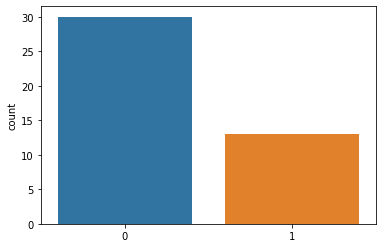

In [ ]:
sns.countplot(Y_hat)

In [ ]:
np.savetxt("Y_hat_predictions.csv", Y_hat)
files.download('Y_hat_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Predictions Model 6: Random Forest Classifier**#

In [41]:
df_Test = pd.read_csv(io.StringIO(uploaded['imbalanced_testing_data_1_predictor_values.csv'].decode('utf-8')))
df_Test.head()

,Transaction,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,T263275,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,-5.945634,4.475905,-7.607261,-0.160723,-13.010749,1.094382,-2.864039,-2.871342,-0.180614,0.647709,0.816558,0.587728,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,160870
1,T250007,2.091651,-0.169025,-1.668564,-0.058837,0.684833,0.148902,0.003661,-0.018512,0.358000,0.235923,-0.042033,0.674443,0.086213,0.414888,-0.524910,0.439062,-0.948905,0.028002,0.852307,-0.139733,-0.311108,-0.854486,0.225296,-0.354132,-0.171976,0.210693,-0.082989,-0.072972,8.99,154679
2,T255404,1.170756,2.501038,-4.986159,5.374160,0.997798,-1.259004,-1.237689,0.358426,-2.612489,-3.064730,3.480602,-3.735153,-0.594778,-8.229952,-1.476094,-0.408471,-1.481283,0.347627,-1.164414,0.227618,0.123145,-0.713201,-0.080868,-0.964310,0.338568,0.068630,0.481588,0.268226,4.97,157207
3,T250006,1.801664,-0.894195,-0.156837,0.611137,-1.047178,-0.129124,-0.733517,0.014156,-0.625758,1.090806,0.916235,1.256150,1.206246,-0.045645,-0.126912,-0.898035,-0.735040,1.615621,-1.195031,-0.381646,-0.341791,-0.653244,0.345701,-0.070720,-0.568136,-0.956699,0.067724,-0.007922,113.00,154679
4,T263081,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,160791


In [42]:
# Remove 'Transaction' column 
x_test_df = df_Test.drop(columns=['Transaction'])

In [72]:
Y_hat = best_grid_rf.predict(x_test_df)

In [73]:
df_Test['Y_hat'] = Y_hat
df_Test['Y_hat'].value_counts()

0    23
1    20
Name: Y_hat, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


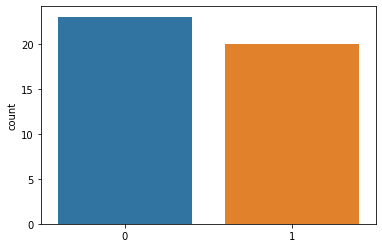

In [74]:
sns.countplot(Y_hat)

In [ ]:
np.savetxt("Y_hat_predictions.csv", Y_hat)
files.download('Y_hat_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>